# Data Analysis and Data Visualization

In [1]:
# !pip install cufflinks

In [2]:
import numpy as np 
import pandas as pd
import pandas.util.testing as tm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly import __version__
import cufflinks as cf

In [3]:
df = pd.read_csv("DataAnalyst.csv")

In [4]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\r\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\r\n\r\nProvides analytical and techni...,3.8,Visiting Nurse Service of New York\r\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\r\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\r\nRemote:Yes\r\n...,4.1,Celerity\r\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...,3.9,FanDuel\r\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [5]:
df.shape

(2253, 16)

In [6]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [7]:
#Since only one value is missing
df.dropna(inplace = True)
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [8]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [9]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

# Data Visualization

In [10]:
df['Company Name'] = df['Company Name'].astype(str).str[:-4]

In [11]:
df['Company Name']

0                Vera Institute of Justice\r
1       Visiting Nurse Service of New York\r
2                              Squarespace\r
3                                 Celerity\r
4                                  FanDuel\r
                        ...                 
2248                         Avacend, Inc.\r
2249                     Arrow Electronics\r
2250                                    Spic
2251           Contingent Network Services\r
2252                            SCL Health\r
Name: Company Name, Length: 2252, dtype: object

In [12]:
# df.info()
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

## Top 15 Companies

In [84]:
company = df['Company Name'].value_counts().nlargest(n=15)
company

Staffigo Technical Services, LLC\r    58
Diverse Lynx\r                        22
Kforce\r                              19
Lorven Technologies Inc\r             19
Mondo\r                               14
Robert Half\r                         14
Avacend, Inc.\r                       13
Apex Systems\r                        10
eTeam Inc.\r                          10
Apple\r                               10
Reliable Software Resources\r          9
APN Software Services Inc.\r           9
Randstad\r                             8
TechUSA\r                              8
MUFG\r                                 7
Name: Company Name, dtype: int64

In [96]:
# df['Company Name'].value_counts(ascending=False)[:15]
# df['Company Name'].value_counts().nlargest(n=15)

In [101]:
# company.plot(kind='bar')

In [106]:
company = df['Company Name'].value_counts().nlargest(n=15)
fig = px.bar(y=company.values,
       x=company.index,
       orientation='v',
       color=company.index,
       text=company.values,
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=1000, 
                  showlegend=False, 
                  xaxis_title="Company",
                  yaxis_title="Count",
                  title="Top 15 Companies by job count")
fig.show()


In [112]:
# df['Job Title'].value_counts()[:10].plot(kind='bar')

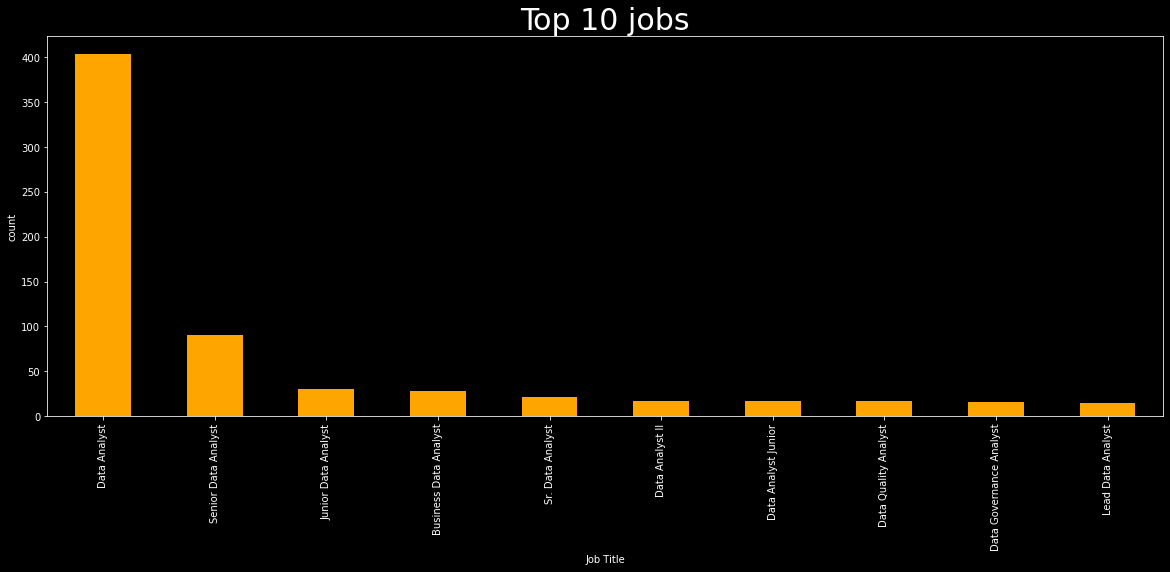

In [22]:
# To show top 10 jobs
plt.style.use('dark_background')
df['Job Title'].value_counts().head(10).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Top 10 jobs', fontsize = 30, fontweight = 20)
plt.xlabel('Job Title')
plt.ylabel('count')
plt.show()

In [15]:
#Same using pie chart
role = df['Job Title'].value_counts().nlargest(n=10)
fig = px.pie(role, 
       values = role.values, 
       names = role.index, 
       title="Top 10 Job Titles", 
       color=role.values,
       color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(opacity=0.7,
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_x=0.5)
fig.show()

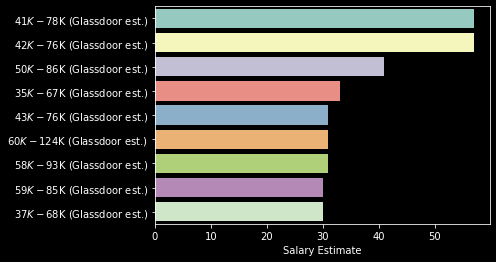

In [114]:
sns.barplot(x=df['Salary Estimate'].value_counts()[0:9],y=df['Salary Estimate'].value_counts()[0:9].index)

In [16]:
location = df['Location'].value_counts().nlargest(n=10)
fig = px.bar(y=location.values,
       x=location.index,
       orientation='v',
       color=location.index,
       text=location.values,
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=800, 
                  showlegend=False, 
                  xaxis_title="City",
                  yaxis_title="Count",
                  title="Top 10 cities by job count")
fig.show()

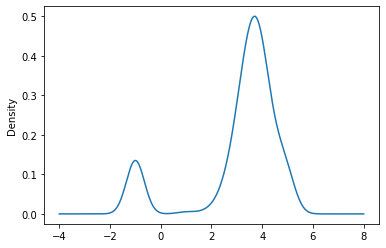

In [17]:
df['Rating'].plot(kind='density')

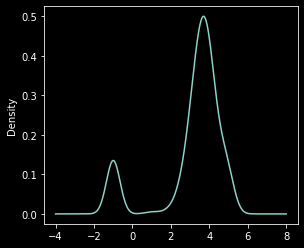

In [116]:
#MAximum ratings
df['Rating'].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

In [117]:
# TOp Location for jobs
df['Location'].value_counts().head(8)

New York, NY         310
Chicago, IL          130
San Francisco, CA    119
Austin, TX            81
Los Angeles, CA       80
Charlotte, NC         78
Houston, TX           72
Dallas, TX            66
Name: Location, dtype: int64

In [118]:
# Top Industries 

df['Industry'].value_counts().head(8)

-1                                         352
IT Services                                325
Staffing & Outsourcing                     323
Health Care Services & Hospitals           151
Consulting                                 111
Computer Hardware & Software               111
Investment Banking & Asset Management       78
Enterprise Software & Network Solutions     69
Name: Industry, dtype: int64